<a href="https://colab.research.google.com/github/Mytros/DS_ML_homework/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85_Dmytro_Koval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
cars_df = pd.read_csv('drive/MyDrive/DS_ML/cars.csv')

Mounted at /content/drive


In [ ]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [ ]:
# Nulls
missing_values = cars_df.isnull().sum()
missing_values[missing_values > 0]

,0


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [ ]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

In [ ]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [ ]:
numerical_cols = cars_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = cars_df.select_dtypes(include=['object']).columns.tolist()
print("Numerical:", numerical_cols, len(numerical_cols))
print("Categorical:", categorical_cols, len(categorical_cols))

Numerical: ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price'] 8
Categorical: ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type'] 5


In [ ]:
# Categorical
categorical_summary = {
    col: {
        "n_unique": cars_df[col].nunique(),
        "unique_values": cars_df[col].unique().tolist()
    }
    for col in categorical_cols
}

categorical_summary

{'Brand': {'n_unique': 11,
  'unique_values': ['Toyota',
   'Honda',
   'Ford',
   'Maruti',
   'Hyundai',
   'Tata',
   'Mahindra',
   'Volkswagen',
   'Audi',
   'BMW',
   'Mercedes']},
 'Model': {'n_unique': 58,
  'unique_values': ['Corolla',
   'Civic',
   'Mustang',
   'Swift',
   'Sonata',
   'Nexon',
   'Scorpio',
   'Polo',
   'A4',
   'X1',
   'C-Class',
   'Endeavour',
   'Creta',
   'Harrier',
   'Ertiga',
   'City',
   'Tiguan',
   'Q3',
   '5 Series',
   'GLC',
   'Innova',
   'Figo',
   'Verna',
   'Altroz',
   'Thar',
   'Passat',
   'A6',
   'X3',
   'E-Class',
   'Fortuner',
   'Aspire',
   'Elantra',
   'Safari',
   'Vitara',
   'WR-V',
   'Ameo',
   'A3',
   '7 Series',
   'GLE',
   'Yaris',
   'Ranger',
   'Santro',
   'Tigor',
   'S-Cross',
   'BR-V',
   'T-Roc',
   'Q7',
   'X5',
   'GLA',
   'Camry',
   'Venue',
   'Tiago',
   'XUV300',
   'Vento',
   'A5',
   '3 Series',
   'Innova Crysta',
   'EcoSport']},
 'Fuel_Type': {'n_unique': 2, 'unique_values': ['Petrol

In [ ]:
pd.DataFrame.from_dict(categorical_summary, orient="index")

,n_unique,unique_values
Brand,11,"[Toyota, Honda, Ford, Maruti, Hyundai, Tata, M..."
Model,58,"[Corolla, Civic, Mustang, Swift, Sonata, Nexon..."
Fuel_Type,2,"[Petrol, Diesel]"
Transmission,2,"[Manual, Automatic]"
Owner_Type,3,"[First, Second, Third]"


Висновок:

В наборі даних 13 колонок: 8 числових і 5 категоріальних колонок, з них:

- 2 бінарні (мають лише 2 значення) (Transmission, Fuel_Type)

- 2 мультикатегоріальні без порядку (Brand, Model)

- 1 мультикатегоріальна з порядком (Owner_Type)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [ ]:
# target
y = cars_df["Price"]

# features
X = cars_df.drop(columns=["Price"])

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12
)

# shape check
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 12), (20, 12), (80,), (20,))

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [ ]:
# 4.1 Fuel_Type and Transmission ma[[ing]]
for col in ['Fuel_Type', 'Transmission']:

    most_common = X_train[col].value_counts().idxmax()
    unique_values = X_train[col].unique().tolist()
    bin_map = {val: int(val == most_common) for val in unique_values}
    X_train[col] = X_train[col].map(bin_map)
    X_test[col] = X_test[col].map(bin_map)

# 4.2.  Brand  OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
brand_train_encoded = ohe.fit_transform(X_train[['Brand']])
brand_test_encoded = ohe.transform(X_test[['Brand']])

brand_cols = ohe.get_feature_names_out(['Brand'])

# update dataframes
X_train[brand_cols] = pd.DataFrame(brand_train_encoded, index=X_train.index)
X_test[brand_cols] = pd.DataFrame(brand_test_encoded, index=X_test.index)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [ ]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,1,1,Second,18,1498,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,0,1,First,17,1968,187,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,1,1,First,15,1984,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,1,1,Second,15,1395,148,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,1,0,Third,20,1086,68,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,1,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,1,0,Third,20,1194,94,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

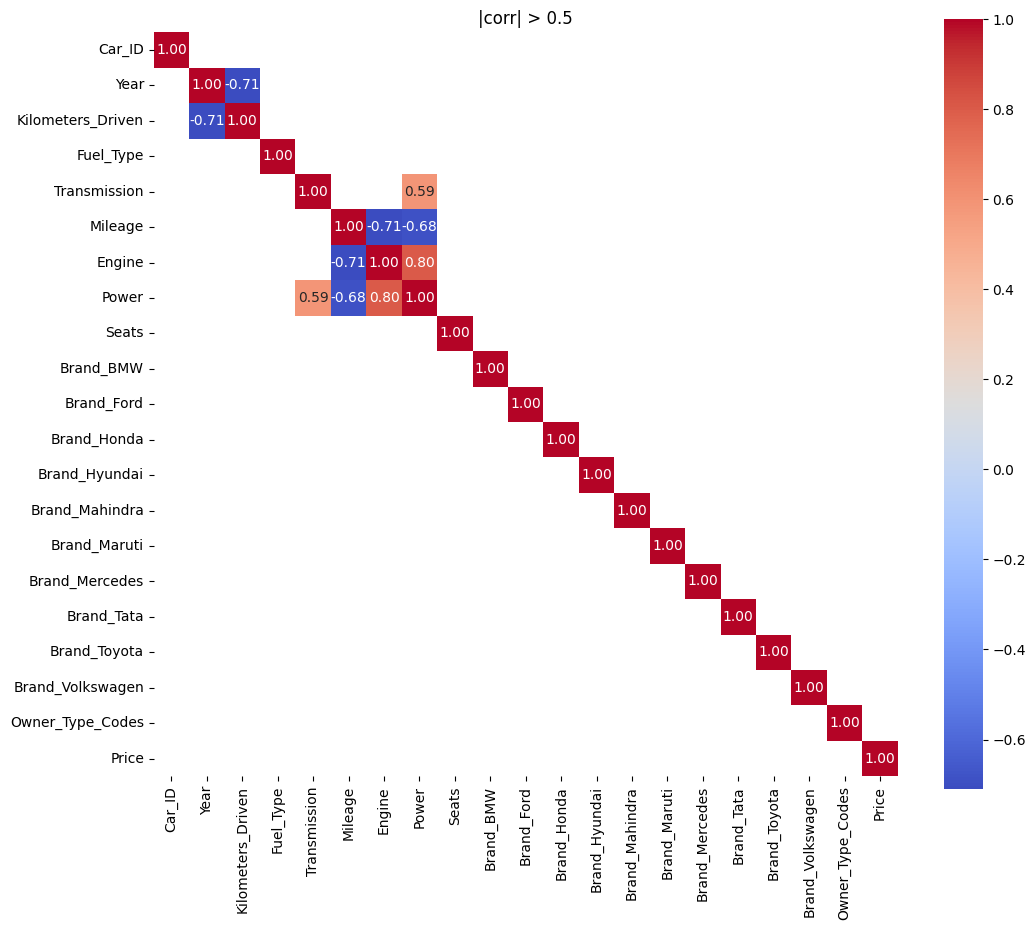

In [ ]:
# 1. Numeric
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])

# 2. concat y_train
train_numeric_full = pd.concat([X_train_numeric, y_train.reset_index(drop=True)], axis=1)

# 3. corr matrix
correlation_matrix = train_numeric_full.corr(numeric_only=True)

# 4. |corr| > 0.5
filtered_corr = correlation_matrix.where(abs(correlation_matrix) > 0.5)

# 5. mask
mask = np.triu(np.ones_like(filtered_corr, dtype=bool))

# 6. plot
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, mask=False)
plt.title("|corr| > 0.5")
plt.show()


Висновок:

Жодна змінна не має кореляції з Price більше ніж 0.5, отже, сильної лінійної залежності між окремими ознаками і ціною немає.

Проте деякі ознаки мають сильну взаємну кореляцію між собою:

Kilometers_Driven та Year: -0.71

Power та Transmission: 0.59

Engine та Mileage: -0.71

Це свідчить про те, що хоча ознаки можуть впливати на ціну, їхній вплив не є лінійним або проявляється в поєднанні з іншими.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [ ]:
# delete non-numeric
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

# LinReg
model = LinearRegression()
model.fit(X_train_numeric, y_train)

y_train_pred = model.predict(X_train_numeric)
y_test_pred = model.predict(X_test_numeric)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

rmse_train, rmse_test

(np.float64(210293.57828151857), np.float64(258181.56112032657))

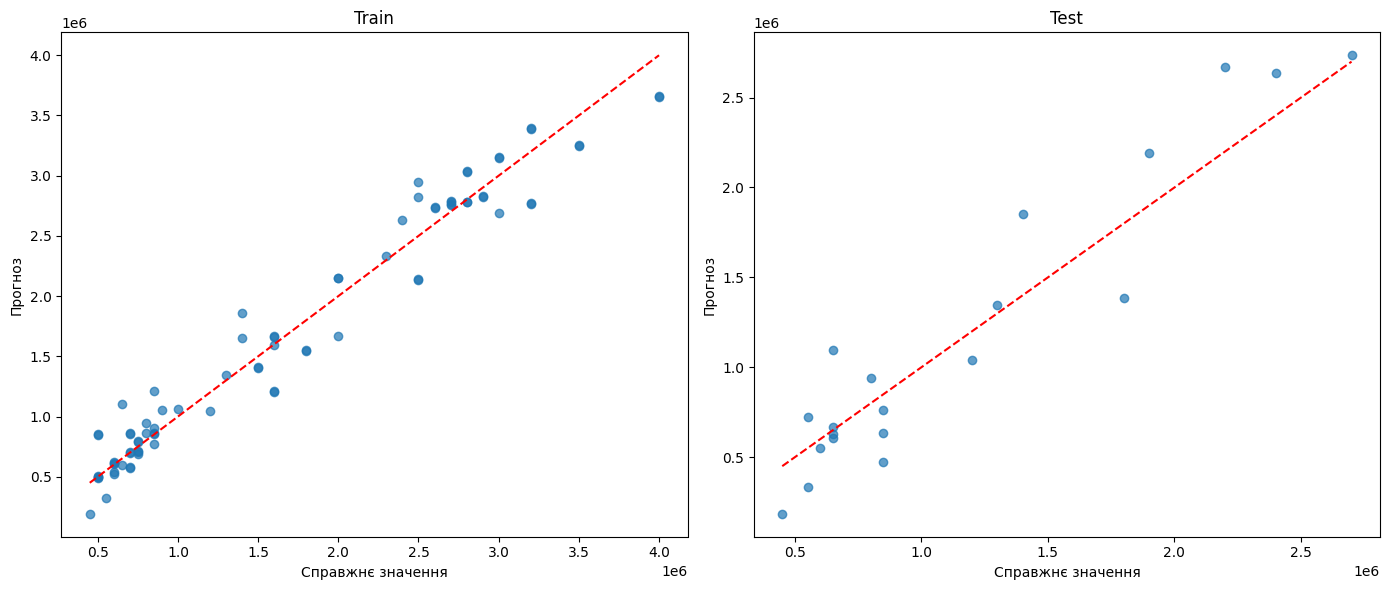

In [ ]:
plt.figure(figsize=(14, 6))

# train
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Справжнє значення")
plt.ylabel("Прогноз")
plt.title("Train")

# test
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Справжнє значення")
plt.ylabel("Прогноз")
plt.title("Test")

plt.tight_layout()
plt.show()

RMSE:

Навчальна вибірка (Train): 210,294

Тестова вибірка (Test): 258,182

Модель показує загальну відповідність для тренувальних і тестових даних. Є деяке розсіювання навколо прямої, особливо в тестовій вибірці.

RMSE train < RMSE test

Потенціал для покращення (наприклад, за допомогою масштабування, відбору ознак)

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [ ]:
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

# train on scaled data
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# coeff`s
coefficients = pd.Series(model_scaled.coef_, index=X_train_numeric.columns)
coefficients_sorted = coefficients.sort_values(key=abs, ascending=False)

coefficients_sorted

,0
Power,496769.214899
Brand_Ford,-334761.655121
Brand_Hyundai,-332815.861280
Brand_Tata,-292649.105520
Brand_Mahindra,-290310.207388
Brand_Volkswagen,-286620.547297
Brand_Maruti,-278152.872913
Brand_Honda,-228645.911279
Brand_Toyota,-189794.446257
Fuel_Type,-183848.018909


Спостереження:

Power має найбільший позитивний вплив. Чим потужніше авто, тим вища його вартість.

Бюджетні бренди (Ford, Tata, Hyundai, Mahindra) мають негативні коефіцієнти.

Чим більше пробіг і миля/літр (Mileage), тим менше ціна.

Автоматична трансмісія підвищує ціну.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [ ]:
# scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_numeric)

X_scaled_df = pd.DataFrame(X_scaled, columns=X_train_numeric.columns, index=y_train.index)
X_sm = sm.add_constant(X_scaled_df)
model = sm.OLS(y_train, X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        15:02:34   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.74e+0

In [ ]:
summary_df = pd.DataFrame({
    "feature": X_sm.columns,
    "coefficient": results.params.values,
    "p_value": results.pvalues.values
})
significant = summary_df[summary_df["p_value"] <= 0.05].sort_values("p_value")

In [ ]:
print(significant)

             feature   coefficient       p_value
0              const  1.680000e+06  3.734558e-55
13     Brand_Hyundai -3.328159e+05  9.503332e-11
14    Brand_Mahindra -2.903102e+05  3.316128e-09
11        Brand_Ford -3.347617e+05  5.917341e-09
19  Brand_Volkswagen -2.866205e+05  8.347087e-09
8              Power  4.967692e+05  1.343837e-08
15      Brand_Maruti -2.781529e+05  2.200701e-08
17        Brand_Tata -2.926491e+05  1.500955e-06
12       Brand_Honda -2.286459e+05  2.029401e-06
4          Fuel_Type -1.838480e+05  1.639420e-04
18      Brand_Toyota -1.897944e+05  1.833336e-04
5       Transmission  1.166938e+05  1.022962e-02
6            Mileage -1.317155e+05  2.760048e-02


Спостереження:

- Power є найбільш значущою позитивною змінною. Чим потужніший автомобіль, тим він дорожчий.

- Transmission також має позитивний вплив. Автоматичні коробки зазвичай збільшують ціну.

- Fuel_Type і Mileage мають негативний вплив, тобто, автомобілі з більшою витратою пального або "дешевшим" типом палива вартують менше.

- Усі значущі бренди мають негативні коефіцієнти, тобто дешевші за базовий бренд.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [38]:
# filter significant features
significant_features = significant[significant["feature"] != "const"]["feature"].tolist()

X_train_sig = X_scaled_df[significant_features]

# add constant
X_sig_sm = sm.add_constant(X_train_sig)

model_sig = sm.OLS(y_train, X_sig_sm)
results_sig = model_sig.fit()

print(results_sig.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           6.31e-40
Time:                        15:46:50   Log-Likelihood:                -1098.2
No. Observations:                  80   AIC:                             2222.
Df Residuals:                      67   BIC:                             2253.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              1.68e+06   2.71e+04  

Значення R² та Adj. R² = 0.95, залишилися на дуже високому рівні,майже як у повної моделі

При цьому ми спростили модель, залишивши лише 12 найважливіших ознак.

Це означає, що менш значущі ознаки не давали помітного приросту точності, і модель на основі ключових факторів працює ефективно.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [ ]:
# p-value < 0.25
features_p025 = summary_df[(summary_df["p_value"] < 0.25) & (summary_df["feature"] != "const")]["feature"].tolist()

# new train X
X_train_p025 = X_scaled_df[features_p025]
X_train_p025_sm = sm.add_constant(X_train_p025)

# model
model_p025 = sm.OLS(y_train, X_train_p025_sm)
results_p025 = model_p025.fit()

print(results_p025.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     115.4
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.23e-40
Time:                        15:03:23   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2217.
Df Residuals:                      66   BIC:                             2251.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.61e+0

In [ ]:
from sklearn.linear_model import LinearRegression

def train_model_show_rmse(inputs, targets):
    model = LinearRegression().fit(inputs, targets)
    predictions = model.predict(inputs)
    loss = np.sqrt(mean_squared_error(targets, predictions))
    print('Loss:', round(loss, 2))
    return model, loss

# data
X_full = X_scaled_df                          # all features
X_sig = X_scaled_df[significant_features]     # p <= 0.05
X_p025 = X_scaled_df[features_p025]           # p < 0.25

# training
model_full, loss_full = train_model_show_rmse(X_full, y_train)
model_sig, loss_sig = train_model_show_rmse(X_sig, y_train)
model_p025, loss_p025 = train_model_show_rmse(X_p025, y_train)

print("Full Loss:", loss_full)
print("p <= 0.05 Loss:", loss_sig)
print("p < 0.25 Loss:", loss_p025)

Loss: 210293.58
Loss: 221484.13
Loss: 212212.62
Full Loss: 210293.5782815185
p <= 0.05 Loss: 221484.134185077
p < 0.25 Loss: 212212.62436853838


Висновок:


- Модель із p < 0.25 дає дуже подібну якість до повної, але має менше ознак це добре для інтерпретованості.

- Вона краща за модель з p ≤ 0.05, бо має вищий R² та менший loss.

- Отже, модель з p < 0.25 найкращий компроміс між точністю та простотою і включає 13 features в моделі.